<a href="https://colab.research.google.com/github/tanishayadav16/DL_exp3/blob/main/exp13_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 106s 218ms/step - loss: 0.2225 - val_loss: 0.0796
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 138s 211ms/step - loss: 0.0787 - val_loss: 0.0746
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 99s 210ms/step - loss: 0.0746 - val_loss: 0.0725
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 214ms/step - loss: 0.0729 - val_loss: 0.0712
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 211ms/step - loss: 0.0718 - val_loss: 0.0704
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 208ms/step - loss: 0.0707 - val_loss: 0.0697
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 98s 210ms/step - loss: 0.0702 - val_loss: 0.0691
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 212ms/step - loss: 0.0696 - val_loss: 0.0687
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 208ms/step - loss: 0.0691 - val_loss: 0.0683
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 211ms/step - loss: 0.0688 - val_loss: 0.0683
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 208ms

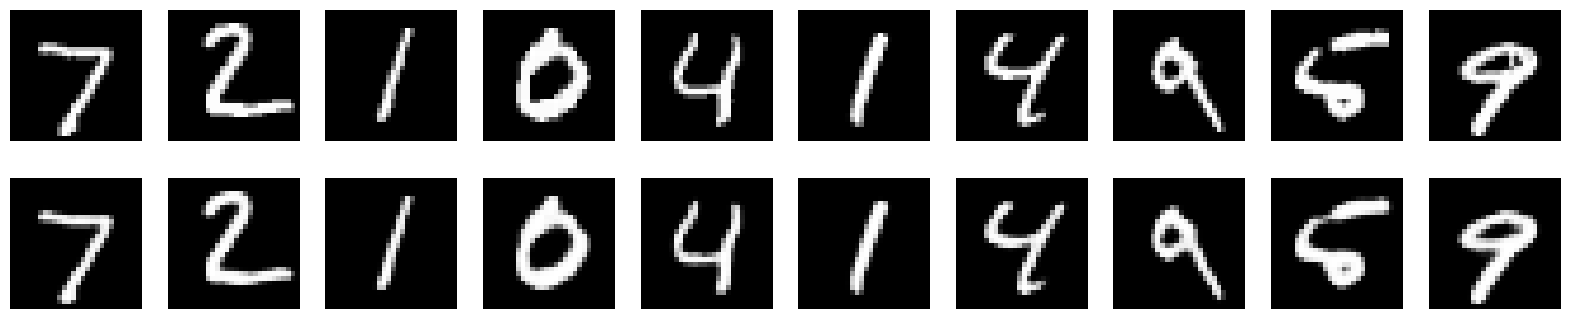

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

# Load MNIST data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and reshape
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # (60000, 28, 28, 1)
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))    # (10000, 28, 28, 1)

# Build Convolutional Autoencoder
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)  # Output shape: (7, 7, 16)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train model
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

# Predict on test data
decoded_imgs = autoencoder.predict(x_test)

# Plotting original vs reconstructed
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()
